In [9]:
!pip install kaggle
!kaggle datasets download -d kmader/food41


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105797 sha256=36e753ed7cd70613c8d32cfaeffd68fc18f1eed96f0da077ed79ce3952356251
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle
Dataset URL: https://www.kaggle.com/datasets/kmader/food41
License(s): copyright-authors
food41.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)


2.5.1
0.20.1


In [11]:
import zipfile
import os
import shutil
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Specify the path to the zip file
zip_path = "C:\\Users\\admin\\Desktop\\aps360_labbook\\progresscheck\\modelComparison\\food41.zip"

# Unzip the dataset
data_dir = "C:\\Users\\admin\\Desktop\\aps360_labbook\\progresscheck\\modelComparison\\data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

print("Dataset unzipped successfully!")

# Set up paths for images and metadata
images_dir = os.path.join(data_dir, 'images')
train_file = os.path.join(data_dir, 'meta', 'meta', 'train.txt')
test_file = os.path.join(data_dir, 'meta', 'meta', 'test.txt')

# Define directories for train and test datasets
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to create class directories and move images based on file paths
def organize_images(file_path, dest_dir):
    with open(file_path, 'r') as f:
        for line in f:
            # Extract class name and image name from each line
            line = line.strip()
            class_name, image_name = line.split('/')

            # Create class directory if it doesn't exist
            class_dir = os.path.join(dest_dir, class_name)
            os.makedirs(class_dir, exist_ok=True)

            # Source and destination paths for the image
            src_path = os.path.join(images_dir, class_name, image_name + '.jpg')
            dest_path = os.path.join(class_dir, image_name + '.jpg')

            # Move the image
            if os.path.exists(src_path):
                shutil.move(src_path, dest_path)
            else:
                print(f"Warning: {src_path} does not exist.")

# Organize train and test images
organize_images(train_file, train_dir)
organize_images(test_file, test_dir)

print("Dataset organized successfully into train and test folders!")

# Define transformations for loading the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Get number of classes
num_classes = len(train_data.classes)

print(f"Number of classes: {num_classes}")
print("Data loading complete!")


C:\Users\admin\AppData\Local\Temp\ipykernel_41708\4036991085.py:85: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating EfficientNet with 10 epochs and learning rate 0.0001


Epoch 1/10: 100%|██████████| 1184/1184 [07:26<00:00,  2.65it/s]


Epoch 1, Loss: 2.2182


Epoch 2/10: 100%|██████████| 1184/1184 [07:35<00:00,  2.60it/s]


Epoch 2, Loss: 0.9771


Epoch 3/10: 100%|██████████| 1184/1184 [07:16<00:00,  2.71it/s]


Epoch 3, Loss: 0.6697


Epoch 4/10: 100%|██████████| 1184/1184 [06:05<00:00,  3.24it/s]


Epoch 4, Loss: 0.4785


Epoch 5/10: 100%|██████████| 1184/1184 [07:15<00:00,  2.72it/s]


Epoch 5, Loss: 0.3415


Epoch 6/10: 100%|██████████| 1184/1184 [07:22<00:00,  2.68it/s]


Epoch 6, Loss: 0.2459


Epoch 7/10: 100%|██████████| 1184/1184 [06:29<00:00,  3.04it/s]


Epoch 7, Loss: 0.1892


Epoch 8/10: 100%|██████████| 1184/1184 [07:09<00:00,  2.76it/s]


Epoch 8, Loss: 0.1486


Epoch 9/10: 100%|██████████| 1184/1184 [06:04<00:00,  3.25it/s]


Epoch 9, Loss: 0.1182


Epoch 10/10: 100%|██████████| 1184/1184 [06:02<00:00,  3.27it/s]


Epoch 10, Loss: 0.1009


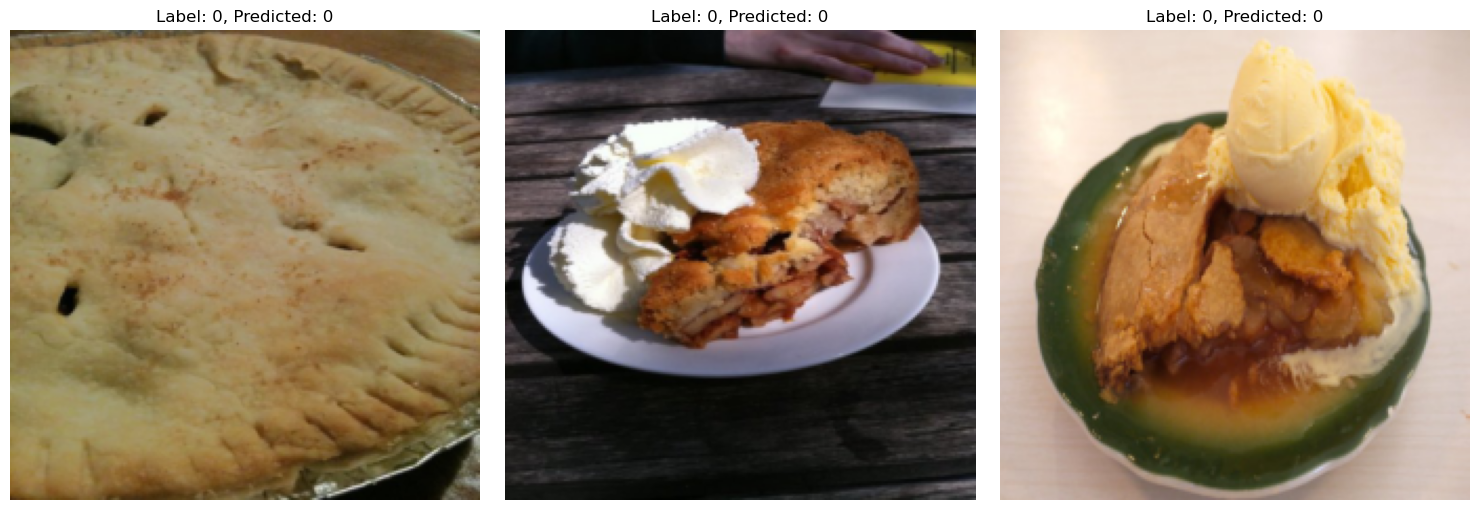

Test Results for EfficientNet - Accuracy: 0.6250, Precision: 1.0000, Recall: 0.6250, F1: 0.7692

Results for EfficientNet:
Accuracy: 0.6250
Precision: 1.0000
Recall: 0.6250
F1: 0.7692


In [8]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define transformations (224x224 for EfficientNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\train', transform=transform)
test_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\test', transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Get number of classes
num_classes = len(train_data.classes)

# Function to load EfficientNet model
def load_efficientnet_model(num_classes):
    model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.DEFAULT)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model

# Evaluation function with plotting
def evaluate_model_and_plot(model, loader, device, num_samples=3):
    model.eval()
    all_preds, all_labels = [], []
    correct_examples = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Collect correctly identified images
            for i in range(len(images)):
                if preds[i] == labels[i] and len(correct_examples) < num_samples:
                    correct_examples.append((images[i].cpu(), labels[i].cpu(), preds[i].cpu()))

            if len(correct_examples) >= num_samples:
                break

    # Plot the correctly identified images
    if correct_examples:
        fig, axes = plt.subplots(1, len(correct_examples), figsize=(15, 5))
        for i, (image, label, pred) in enumerate(correct_examples):
            image = image.permute(1, 2, 0)  # Convert from CHW to HWC format
            image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Unnormalize
            image = image.numpy().clip(0, 1)

            axes[i].imshow(image)
            axes[i].axis('off')
            axes[i].set_title(f'Label: {label.item()}, Predicted: {pred.item()}')
        plt.tight_layout()
        plt.show()

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    return accuracy, precision, recall, f1

# Training function
def train_and_evaluate_efficientnet(train_loader, test_loader, device, num_classes, epochs=10, learning_rate=0.0001):
    model = load_efficientnet_model(num_classes).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    use_amp = torch.cuda.is_available()
    scaler = torch.cuda.amp.GradScaler() if use_amp else None

    print(f"\nTraining and evaluating EfficientNet with {epochs} epochs and learning rate {learning_rate}")
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, (images, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            if use_amp:
                with torch.amp.autocast(device_type='cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1):.4f}")

    # Evaluate on test data and plot correct examples
    accuracy, precision, recall, f1 = evaluate_model_and_plot(model, test_loader, device)
    print(f"Test Results for EfficientNet - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Run EfficientNet training and evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = train_and_evaluate_efficientnet(train_loader, test_loader, device, num_classes, epochs=10, learning_rate=0.0001)

# Display results
print("\nResults for EfficientNet:")
for metric, value in results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

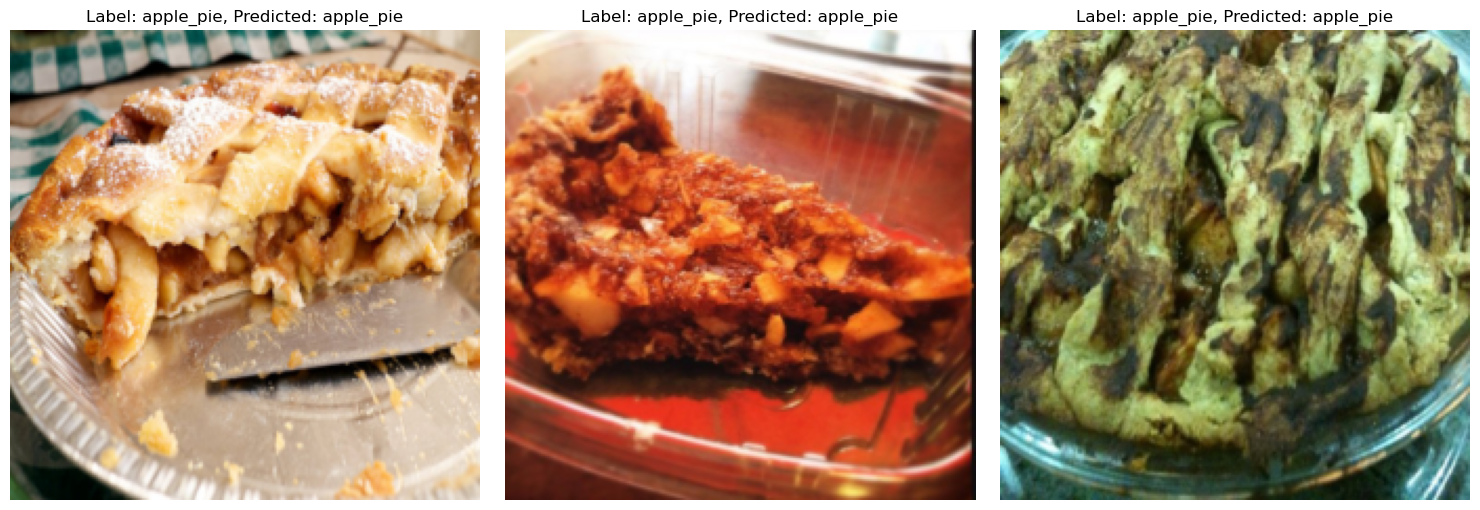

In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define transformations (224x224 for EfficientNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load test dataset
test_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\test', transform=transform)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Get number of classes
num_classes = len(test_data.classes)

# Function to load EfficientNet model
def load_efficientnet_model(num_classes):
    model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.DEFAULT)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model

# Evaluation function with plotting
def evaluate_model_and_plot(model, loader, device, num_samples=3):
    model.eval()
    correct_examples = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            # Collect correctly identified images
            for i in range(len(images)):
                if preds[i] == labels[i] and len(correct_examples) < num_samples:
                    correct_examples.append((images[i].cpu(), labels[i].cpu(), preds[i].cpu()))

            if len(correct_examples) >= num_samples:
                break

    # Plot the correctly identified images
    if correct_examples:
        fig, axes = plt.subplots(1, len(correct_examples), figsize=(15, 5))
        for i, (image, label, pred) in enumerate(correct_examples):
            image = image.permute(1, 2, 0)  # Convert from CHW to HWC format
            image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Unnormalize
            image = image.numpy().clip(0, 1)

            axes[i].imshow(image)
            axes[i].axis('off')
            axes[i].set_title(f'Label: {test_data.classes[label.item()]}, Predicted: {test_data.classes[pred.item()]}')
        plt.tight_layout()
        plt.show()

# Load and evaluate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_efficientnet_model(num_classes).to(device)
model.eval()

# Plot results on test data
evaluate_model_and_plot(model, test_loader, device)


Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.
Starting training...
Epoch 1/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1808s 756ms/step - accuracy: 0.3519 - loss: 2.7586 - val_accuracy: 0.0099 - val_loss: 128.9003
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1823s 770ms/step - accuracy: 0.6106 - loss: 1.4978 - val_accuracy: 0.0095 - val_loss: 5.5559
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 2641s 1s/step - accuracy: 0.6641 - loss: 1.2753 - val_accuracy: 0.0148 - val_loss: 5.5019
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1784s 753ms/step - accuracy: 0.6935 - loss: 1.1513 - val_accuracy: 0.0099 - val_loss: 5.1775
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1798s 759ms/step - accuracy: 0.7178 - loss: 1.0461 - val_accuracy: 0.0139 - val_loss: 5.1418
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1798s 759ms/step - accuracy: 0.7351 - loss: 0.9751 - val_accuracy: 0.0138 - val_loss: 5.4058
Epoch 7/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1787s 755ms/step - accuracy: 0.7520 - 

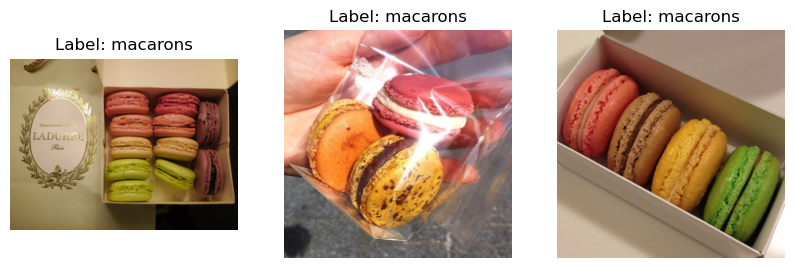

In [58]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import random

# Paths to training and testing data
train_data_path = r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\train'
test_data_path = r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\test'

# Hyperparameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001

# Data Generators for training and testing sets
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define the model architecture with EfficientNetB0
input_layer = Input(shape=(224, 224, 3))
base_model = EfficientNetB0(include_top=False, input_tensor=input_layer, weights='imagenet')
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output_layer = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
print("Starting training...")
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=test_generator
)

# Evaluate and collect correct predictions on the test set
correct_predictions = []

# Generate predictions in batches
predictions = model.predict(test_generator, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes  # Actual labels from test_generator

# Map integer labels back to class names
class_indices = {v: k for k, v in test_generator.class_indices.items()}

# Collect images and labels for correct predictions
for i, (pred_label, true_label) in enumerate(zip(predicted_labels, true_labels)):
    if pred_label == true_label:
        img_path = test_generator.filepaths[i]
        img = plt.imread(img_path)
        label_name = class_indices[pred_label]
        correct_predictions.append((img, label_name))

# Calculate and print the percentage of correct predictions
total_cases = len(true_labels)
correct_cases = len(correct_predictions)
accuracy_percentage = (correct_cases / total_cases) * 100
print(f"Percentage of correct predictions: {accuracy_percentage:.2f}% ({correct_cases}/{total_cases})")

# Select 3 random correct predictions (if fewer than 3, show available ones)
num_samples = min(3, len(correct_predictions))
selected_samples = random.sample(correct_predictions, num_samples)

# Plot the selected samples
plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(selected_samples):
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.show()


Epoch 1/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 2783s 1s/step - accuracy: 0.1284 - loss: 5.5495 - val_accuracy: 0.1917 - val_loss: 4.2943
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1995s 842ms/step - accuracy: 0.4704 - loss: 2.7287 - val_accuracy: 0.0446 - val_loss: 4.8011
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1803s 761ms/step - accuracy: 0.5795 - loss: 2.0322 - val_accuracy: 0.4465 - val_loss: 2.6451
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1820s 768ms/step - accuracy: 0.6357 - loss: 1.7101 - val_accuracy: 0.1665 - val_loss: 3.9525
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1805s 762ms/step - accuracy: 0.6685 - loss: 1.5274 - val_accuracy: 0.2611 - val_loss: 3.4040
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1821s 769ms/step - accuracy: 0.6981 - loss: 1.3821 - val_accuracy: 0.1357 - val_loss: 4.1330
Epoch 7/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1765s 745ms/step - accuracy: 0.7178 - loss: 1.2927 - val_accuracy: 0.1775 - val_loss: 3.9175
Epoch 8/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1771s 748ms/step

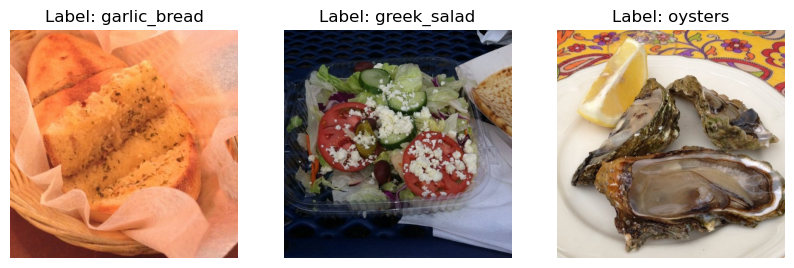

In [59]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Define the model architecture with EfficientNetB0 and regularization
input_layer = Input(shape=(224, 224, 3))
base_model = EfficientNetB0(include_top=False, input_tensor=input_layer, weights='imagenet')

# Unfreeze the last few layers of EfficientNet for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze the top 20 layers
    layer.trainable = True

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # L2 regularization
x = Dropout(0.5)(x)  # Dropout layer to reduce overfitting
output_layer = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with a smaller learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with more epochs
history = model.fit(
    train_generator,
    epochs=10,  # Increase the number of epochs
    validation_data=test_generator
)

# Evaluate and collect correct predictions on the test set
correct_predictions = []

# Generate predictions in batches
predictions = model.predict(test_generator, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Map integer labels back to class names
class_indices = {v: k for k, v in test_generator.class_indices.items()}

# Collect images and labels for correct predictions
for i, (pred_label, true_label) in enumerate(zip(predicted_labels, true_labels)):
    if pred_label == true_label:
        img_path = test_generator.filepaths[i]
        img = plt.imread(img_path)
        label_name = class_indices[pred_label]
        correct_predictions.append((img, label_name))

# Calculate and print the percentage of correct predictions
total_cases = len(true_labels)
correct_cases = len(correct_predictions)
accuracy_percentage = (correct_cases / total_cases) * 100
print(f"Percentage of correct predictions: {accuracy_percentage:.2f}% ({correct_cases}/{total_cases})")

# Plot 3 randomly selected correct predictions
num_samples = min(3, len(correct_predictions))
selected_samples = random.sample(correct_predictions, num_samples)

plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(selected_samples):
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Paths to training and testing data
train_data_path = r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\train'
test_data_path = r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\test'

# Data Generators for training and testing sets
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Define the model architecture with EfficientNetB0 and regularization
input_layer = Input(shape=(224, 224, 3))
base_model = EfficientNetB0(include_top=False, input_tensor=input_layer, weights='imagenet')

# Unfreeze the last few layers of EfficientNet for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze the top 20 layers
    layer.trainable = True

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # L2 regularization
x = Dropout(0.5)(x)  # Dropout layer to reduce overfitting
output_layer = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with a smaller learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with more epochs
history = model.fit(
    train_generator,
    epochs=12,  # Increase the number of epochs if needed
    validation_data=test_generator
)

# Evaluate and collect correct predictions on the test set
correct_predictions = []

# Generate predictions in batches
predictions = model.predict(test_generator, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Map integer labels back to class names
class_indices = {v: k for k, v in test_generator.class_indices.items()}

# Collect images and labels for correct predictions
for i, (pred_label, true_label) in enumerate(zip(predicted_labels, true_labels)):
    if pred_label == true_label:
        img_path = test_generator.filepaths[i]
        img = plt.imread(img_path)
        label_name = class_indices[pred_label]
        correct_predictions.append((img, label_name))

# Calculate and print the percentage of correct predictions
total_cases = len(true_labels)
correct_cases = len(correct_predictions)
accuracy_percentage = (correct_cases / total_cases) * 100
print(f"Percentage of correct predictions: {accuracy_percentage:.2f}% ({correct_cases}/{total_cases})")

# Plot 3 randomly selected correct predictions
num_samples = min(3, len(correct_predictions))
selected_samples = random.sample(correct_predictions, num_samples)

plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(selected_samples):
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.show()

# Save the trained model
model.save(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\trained_model.h5')
print("Model saved successfully!")


Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


c:\Users\admin\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.1283 - loss: 5.5349

c:\Users\admin\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 2062s 863ms/step - accuracy: 0.1283 - loss: 5.5344 - val_accuracy: 0.4455 - val_loss: 2.9288
Epoch 2/12
1892/2368 ━━━━━━━━━━━━━━━━━━━━ 5:33 701ms/step - accuracy: 0.4677 - loss: 2.7476

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\trained_model.h5')
print("Model loaded successfully!")

# Set up the path to the test data
test_data_path = r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\test'

# Data generator for the test dataset
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Path to the individual image you want to test (e.g., an oyster image)
image_path = r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\oyster.jpeg'

# Load and preprocess the image
img = load_img(image_path, target_size=(224, 224))  # Resize to match model input size
img_array = img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

# Make a prediction on the single image
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions, axis=1)[0]

# Map the predicted label back to the class name
class_indices = test_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to map label to class
predicted_class_name = class_indices.get(predicted_label, "Unknown")

# Print the predicted class name
print(f"Predicted class: {predicted_class_name}")

# Display the image with the predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()


In [2]:
import os
import shutil
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define transformations (224x224 for EfficientNet and ResNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\train', transform=transform)
test_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\test', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Get number of classes
num_classes = len(train_data.classes)

# Function to load models with updated weights parameter
def load_model(model_name, num_classes):
    if model_name == 'efficientnet':
        model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.DEFAULT)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif model_name == 'resnet':
        model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model

# Evaluation function
def evaluate_model(model, loader, device):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    return accuracy, precision, recall, f1


In [ ]:

# Training function with custom hyperparameters and model saving
def train_and_evaluate_model(model_name, train_loader, test_loader, device, num_classes, epochs=10, learning_rate=0.001):
    model = load_model(model_name, num_classes).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    use_amp = torch.cuda.is_available()
    scaler = torch.cuda.amp.GradScaler() if use_amp else None

    print(f"\nTraining and evaluating model: {model_name.upper()} with {epochs} epochs and learning rate {learning_rate}")
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, (images, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            if use_amp:
                with torch.amp.autocast(device_type='cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1):.4f}")

    # Evaluate on test data
    accuracy, precision, recall, f1 = evaluate_model(model, test_loader, device)
    print(f"Test Results for {model_name.upper()} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Save the model
    model_save_path = f"{model_name}_model.pth"
    torch.save(model.state_dict(), model_save_path)
    print(f"Model saved to {model_save_path}")

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Run for each model with customized training settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = {}
for model_name in ['efficientnet', 'resnet']:
    results[model_name] = train_and_evaluate_model(model_name, train_loader, test_loader, device, num_classes, epochs=5, learning_rate=0.0005)

# Determine the best model based on the highest F1 score
best_model = max(results, key=lambda model: results[model]['f1'])
best_model_metrics = results[best_model]

# Display results
print("\nFinal Comparison of Model Performance:")
for model_name, metrics in results.items():
    print(f"\nResults for {model_name.upper()}:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

print(f"\nBest Model: {best_model.upper()} with F1 Score: {best_model_metrics['f1']:.4f}")

# Loading the saved model for later use
loaded_model = load_model(best_model, num_classes)
loaded_model.load_state_dict(torch.load(f"{best_model}_model.pth"))
loaded_model.eval()
print(f"\nLoaded {best_model.upper()} model for future use.")


In [ ]:
from sklearn.model_selection import ParameterGrid
import copy

# Define the hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.0001, 0.0005, 0.001],
    'batch_size': [16, 32, 64],
    'epochs': [5, 10],
}

# Function to train, evaluate, and save models with different hyperparameters
def hyperparameter_tuning(model_name, train_data, test_loader, device, num_classes, param_grid):
    best_model = None
    best_f1 = 0
    best_params = {}
    results = {}

    # Iterate over each combination of hyperparameters
    for params in ParameterGrid(param_grid):
        print(f"\nTesting with params: {params}")
        
        # Create DataLoader with current batch size
        train_loader = DataLoader(train_data, batch_size=params['batch_size'], shuffle=True)
        
        # Train and evaluate the model
        metrics = train_and_evaluate_model(
            model_name,
            train_loader,
            test_loader,
            device,
            num_classes,
            epochs=params['epochs'],
            learning_rate=params['learning_rate']
        )

        # Save results and update the best model if necessary
        results[f"{model_name}_{params}"] = metrics
        if metrics['f1'] > best_f1:
            best_f1 = metrics['f1']
            best_params = copy.deepcopy(params)
            best_model = copy.deepcopy(metrics)

    # Display the best result
    print(f"\nBest Hyperparameters for {model_name.upper()}: {best_params}")
    print(f"Best F1 Score: {best_f1:.4f}")

    return best_model, best_params, results

# Run hyperparameter tuning for each model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
final_results = {}
for model_name in ['efficientnet', 'resnet']:
    best_model, best_params, results = hyperparameter_tuning(
        model_name, train_data, test_loader, device, num_classes, param_grid
    )
    final_results[model_name] = {'best_model': best_model, 'best_params': best_params, 'results': results}

# Display final comparison of models
print("\nFinal Comparison of Hyperparameter Tuning Results:")
for model_name, details in final_results.items():
    print(f"\nBest Results for {model_name.upper()}:")
    for metric, value in details['best_model'].items():
        print(f"{metric.capitalize()}: {value:.4f}")
    print(f"Best Hyperparameters: {details['best_params']}")



Testing with params: {'batch_size': 16, 'epochs': 5, 'learning_rate': 0.0001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 5 epochs and learning rate 0.0001


Epoch 1/5: 100%|██████████| 4735/4735 [09:07<00:00,  8.65it/s]


Epoch 1, Loss: 1.8996


Epoch 2/5: 100%|██████████| 4735/4735 [14:07<00:00,  5.59it/s]


Epoch 2, Loss: 0.9509


Epoch 3/5: 100%|██████████| 4735/4735 [11:12<00:00,  7.04it/s]


Epoch 3, Loss: 0.6644


Epoch 4/5: 100%|██████████| 4735/4735 [12:17<00:00,  6.42it/s]


Epoch 4, Loss: 0.4732


Epoch 5/5: 100%|██████████| 4735/4735 [14:49<00:00,  5.32it/s]


Epoch 5, Loss: 0.3437
Test Results for EFFICIENTNET - Accuracy: 0.8339, Precision: 0.8364, Recall: 0.8339, F1: 0.8329
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 16, 'epochs': 5, 'learning_rate': 0.0005}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 5 epochs and learning rate 0.0005


Epoch 1/5: 100%|██████████| 4735/4735 [12:39<00:00,  6.24it/s]


Epoch 1, Loss: 1.6682


Epoch 2/5: 100%|██████████| 4735/4735 [10:39<00:00,  7.41it/s]


Epoch 2, Loss: 1.0277


Epoch 3/5: 100%|██████████| 4735/4735 [07:07<00:00, 11.08it/s]


Epoch 3, Loss: 0.7983


Epoch 4/5: 100%|██████████| 4735/4735 [06:57<00:00, 11.35it/s]


Epoch 4, Loss: 0.6376


Epoch 5/5: 100%|██████████| 4735/4735 [06:55<00:00, 11.39it/s]


Epoch 5, Loss: 0.5192
Test Results for EFFICIENTNET - Accuracy: 0.8101, Precision: 0.8169, Recall: 0.8101, F1: 0.8104
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 16, 'epochs': 5, 'learning_rate': 0.001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 5 epochs and learning rate 0.001


Epoch 1/5: 100%|██████████| 4735/4735 [06:58<00:00, 11.33it/s]


Epoch 1, Loss: 1.9248


Epoch 2/5: 100%|██████████| 4735/4735 [06:56<00:00, 11.35it/s]


Epoch 2, Loss: 1.3027


Epoch 3/5: 100%|██████████| 4735/4735 [06:56<00:00, 11.36it/s]


Epoch 3, Loss: 1.0749


Epoch 4/5: 100%|██████████| 4735/4735 [06:58<00:00, 11.31it/s]


Epoch 4, Loss: 0.9175


Epoch 5/5: 100%|██████████| 4735/4735 [06:58<00:00, 11.32it/s]


Epoch 5, Loss: 0.7996
Test Results for EFFICIENTNET - Accuracy: 0.7885, Precision: 0.7931, Recall: 0.7885, F1: 0.7867
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 16, 'epochs': 10, 'learning_rate': 0.0001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 10 epochs and learning rate 0.0001


Epoch 1/10: 100%|██████████| 4735/4735 [06:57<00:00, 11.33it/s]


Epoch 1, Loss: 1.8899


Epoch 2/10: 100%|██████████| 4735/4735 [06:58<00:00, 11.32it/s]


Epoch 2, Loss: 0.9431


Epoch 3/10: 100%|██████████| 4735/4735 [06:56<00:00, 11.36it/s]


Epoch 3, Loss: 0.6583


Epoch 4/10: 100%|██████████| 4735/4735 [06:58<00:00, 11.32it/s]


Epoch 4, Loss: 0.4736


Epoch 5/10: 100%|██████████| 4735/4735 [06:57<00:00, 11.35it/s]


Epoch 5, Loss: 0.3466


Epoch 6/10: 100%|██████████| 4735/4735 [06:57<00:00, 11.35it/s]


Epoch 6, Loss: 0.2596


Epoch 7/10: 100%|██████████| 4735/4735 [07:02<00:00, 11.22it/s]


Epoch 7, Loss: 0.2130


Epoch 8/10: 100%|██████████| 4735/4735 [06:58<00:00, 11.31it/s]


Epoch 8, Loss: 0.1690


Epoch 9/10: 100%|██████████| 4735/4735 [07:10<00:00, 11.01it/s]


Epoch 9, Loss: 0.1499


Epoch 10/10: 100%|██████████| 4735/4735 [07:05<00:00, 11.13it/s]


Epoch 10, Loss: 0.1329
Test Results for EFFICIENTNET - Accuracy: 0.8296, Precision: 0.8311, Recall: 0.8296, F1: 0.8291
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 16, 'epochs': 10, 'learning_rate': 0.0005}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 10 epochs and learning rate 0.0005


Epoch 1/10: 100%|██████████| 4735/4735 [07:03<00:00, 11.18it/s]


Epoch 1, Loss: 1.6694


Epoch 2/10: 100%|██████████| 4735/4735 [07:03<00:00, 11.17it/s]


Epoch 2, Loss: 1.0279


Epoch 3/10: 100%|██████████| 4735/4735 [07:07<00:00, 11.08it/s]


Epoch 3, Loss: 0.7997


Epoch 4/10: 100%|██████████| 4735/4735 [07:06<00:00, 11.10it/s]


Epoch 4, Loss: 0.6408


Epoch 5/10: 100%|██████████| 4735/4735 [07:06<00:00, 11.11it/s]


Epoch 5, Loss: 0.5242


Epoch 6/10: 100%|██████████| 4735/4735 [06:58<00:00, 11.32it/s]


Epoch 6, Loss: 0.4409


Epoch 7/10: 100%|██████████| 4735/4735 [07:01<00:00, 11.24it/s]


Epoch 7, Loss: 0.3783


Epoch 8/10: 100%|██████████| 4735/4735 [07:06<00:00, 11.11it/s]


Epoch 8, Loss: 0.3300


Epoch 9/10: 100%|██████████| 4735/4735 [07:06<00:00, 11.09it/s]


Epoch 9, Loss: 0.2951


Epoch 10/10: 100%|██████████| 4735/4735 [07:05<00:00, 11.14it/s]


Epoch 10, Loss: 0.2652
Test Results for EFFICIENTNET - Accuracy: 0.8061, Precision: 0.8127, Recall: 0.8061, F1: 0.8064
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 16, 'epochs': 10, 'learning_rate': 0.001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 10 epochs and learning rate 0.001


Epoch 1/10: 100%|██████████| 4735/4735 [07:08<00:00, 11.05it/s]


Epoch 1, Loss: 1.9160


Epoch 2/10: 100%|██████████| 4735/4735 [07:05<00:00, 11.13it/s]


Epoch 2, Loss: 1.2938


Epoch 3/10: 100%|██████████| 4735/4735 [07:03<00:00, 11.17it/s]


Epoch 3, Loss: 1.0759


Epoch 4/10: 100%|██████████| 4735/4735 [07:05<00:00, 11.13it/s]


Epoch 4, Loss: 0.9120


Epoch 5/10: 100%|██████████| 4735/4735 [07:02<00:00, 11.21it/s]


Epoch 5, Loss: 0.7917


Epoch 6/10: 100%|██████████| 4735/4735 [07:06<00:00, 11.12it/s]


Epoch 6, Loss: 0.6816


Epoch 7/10: 100%|██████████| 4735/4735 [07:04<00:00, 11.16it/s]


Epoch 7, Loss: 0.6045


Epoch 8/10: 100%|██████████| 4735/4735 [07:06<00:00, 11.11it/s]


Epoch 8, Loss: 0.5284


Epoch 9/10: 100%|██████████| 4735/4735 [07:03<00:00, 11.18it/s]


Epoch 9, Loss: 0.4691


Epoch 10/10: 100%|██████████| 4735/4735 [07:03<00:00, 11.18it/s]


Epoch 10, Loss: 0.4246
Test Results for EFFICIENTNET - Accuracy: 0.7813, Precision: 0.7854, Recall: 0.7813, F1: 0.7806
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 32, 'epochs': 5, 'learning_rate': 0.0001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 5 epochs and learning rate 0.0001


Epoch 1/5: 100%|██████████| 2368/2368 [06:20<00:00,  6.22it/s]


Epoch 1, Loss: 1.9870


Epoch 2/5: 100%|██████████| 2368/2368 [06:20<00:00,  6.23it/s]


Epoch 2, Loss: 0.9223


Epoch 3/5: 100%|██████████| 2368/2368 [06:20<00:00,  6.23it/s]


Epoch 3, Loss: 0.6316


Epoch 4/5: 100%|██████████| 2368/2368 [06:21<00:00,  6.21it/s]


Epoch 4, Loss: 0.4470


Epoch 5/5: 100%|██████████| 2368/2368 [06:09<00:00,  6.40it/s]


Epoch 5, Loss: 0.3166
Test Results for EFFICIENTNET - Accuracy: 0.8378, Precision: 0.8389, Recall: 0.8378, F1: 0.8370


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None


Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 32, 'epochs': 5, 'learning_rate': 0.0005}

Training and evaluating model: EFFICIENTNET with 5 epochs and learning rate 0.0005


Epoch 1/5: 100%|██████████| 2368/2368 [06:08<00:00,  6.43it/s]


Epoch 1, Loss: 1.5323


Epoch 2/5: 100%|██████████| 2368/2368 [06:05<00:00,  6.48it/s]


Epoch 2, Loss: 0.8490


Epoch 3/5: 100%|██████████| 2368/2368 [06:03<00:00,  6.51it/s]


Epoch 3, Loss: 0.6170


Epoch 4/5: 100%|██████████| 2368/2368 [06:01<00:00,  6.55it/s]


Epoch 4, Loss: 0.4660


Epoch 5/5: 100%|██████████| 2368/2368 [06:03<00:00,  6.52it/s]


Epoch 5, Loss: 0.3661
Test Results for EFFICIENTNET - Accuracy: 0.8189, Precision: 0.8237, Recall: 0.8189, F1: 0.8184
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 32, 'epochs': 5, 'learning_rate': 0.001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 5 epochs and learning rate 0.001


Epoch 1/5: 100%|██████████| 2368/2368 [06:05<00:00,  6.48it/s]


Epoch 1, Loss: 1.6921


Epoch 2/5: 100%|██████████| 2368/2368 [06:01<00:00,  6.55it/s]


Epoch 2, Loss: 1.0611


Epoch 3/5: 100%|██████████| 2368/2368 [06:04<00:00,  6.50it/s]


Epoch 3, Loss: 0.8444


Epoch 4/5: 100%|██████████| 2368/2368 [06:07<00:00,  6.45it/s]


Epoch 4, Loss: 0.6991


Epoch 5/5: 100%|██████████| 2368/2368 [06:12<00:00,  6.36it/s]


Epoch 5, Loss: 0.5831
Test Results for EFFICIENTNET - Accuracy: 0.7923, Precision: 0.8001, Recall: 0.7923, F1: 0.7909
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.0001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 10 epochs and learning rate 0.0001


Epoch 1/10: 100%|██████████| 2368/2368 [06:12<00:00,  6.36it/s]


Epoch 1, Loss: 2.0008


Epoch 2/10: 100%|██████████| 2368/2368 [06:13<00:00,  6.33it/s]


Epoch 2, Loss: 0.9262


Epoch 3/10: 100%|██████████| 2368/2368 [06:29<00:00,  6.07it/s]


Epoch 3, Loss: 0.6398


Epoch 4/10: 100%|██████████| 2368/2368 [06:48<00:00,  5.80it/s]


Epoch 4, Loss: 0.4503


Epoch 5/10: 100%|██████████| 2368/2368 [06:41<00:00,  5.90it/s]


Epoch 5, Loss: 0.3238


Epoch 6/10: 100%|██████████| 2368/2368 [06:41<00:00,  5.90it/s]


Epoch 6, Loss: 0.2375


Epoch 7/10: 100%|██████████| 2368/2368 [06:37<00:00,  5.95it/s]


Epoch 7, Loss: 0.1823


Epoch 8/10: 100%|██████████| 2368/2368 [06:43<00:00,  5.87it/s]


Epoch 8, Loss: 0.1453


Epoch 9/10: 100%|██████████| 2368/2368 [06:41<00:00,  5.90it/s]


Epoch 9, Loss: 0.1224


Epoch 10/10: 100%|██████████| 2368/2368 [06:45<00:00,  5.84it/s]


Epoch 10, Loss: 0.1067
Test Results for EFFICIENTNET - Accuracy: 0.8329, Precision: 0.8362, Recall: 0.8329, F1: 0.8328
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.0005}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 10 epochs and learning rate 0.0005


Epoch 1/10: 100%|██████████| 2368/2368 [06:45<00:00,  5.84it/s]


Epoch 1, Loss: 1.5488


Epoch 2/10: 100%|██████████| 2368/2368 [06:46<00:00,  5.82it/s]


Epoch 2, Loss: 0.8549


Epoch 3/10: 100%|██████████| 2368/2368 [06:47<00:00,  5.82it/s]


Epoch 3, Loss: 0.6231


Epoch 4/10: 100%|██████████| 2368/2368 [06:46<00:00,  5.83it/s]


Epoch 4, Loss: 0.4685


Epoch 5/10: 100%|██████████| 2368/2368 [06:40<00:00,  5.92it/s]


Epoch 5, Loss: 0.3681


Epoch 6/10: 100%|██████████| 2368/2368 [06:40<00:00,  5.91it/s]


Epoch 6, Loss: 0.3036


Epoch 7/10: 100%|██████████| 2368/2368 [06:41<00:00,  5.89it/s]


Epoch 7, Loss: 0.2638


Epoch 8/10: 100%|██████████| 2368/2368 [06:39<00:00,  5.92it/s]


Epoch 8, Loss: 0.2284


Epoch 9/10: 100%|██████████| 2368/2368 [06:45<00:00,  5.85it/s]


Epoch 9, Loss: 0.2031


Epoch 10/10: 100%|██████████| 2368/2368 [06:28<00:00,  6.10it/s]


Epoch 10, Loss: 0.1895
Test Results for EFFICIENTNET - Accuracy: 0.8132, Precision: 0.8169, Recall: 0.8132, F1: 0.8120
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 10 epochs and learning rate 0.001


Epoch 1/10: 100%|██████████| 2368/2368 [06:13<00:00,  6.33it/s]


Epoch 1, Loss: 1.6873


Epoch 2/10: 100%|██████████| 2368/2368 [06:08<00:00,  6.43it/s]


Epoch 2, Loss: 1.0636


Epoch 3/10: 100%|██████████| 2368/2368 [06:05<00:00,  6.48it/s]


Epoch 3, Loss: 0.8569


Epoch 4/10: 100%|██████████| 2368/2368 [06:07<00:00,  6.45it/s]


Epoch 4, Loss: 0.7048


Epoch 5/10: 100%|██████████| 2368/2368 [06:06<00:00,  6.47it/s]


Epoch 5, Loss: 0.5817


Epoch 6/10: 100%|██████████| 2368/2368 [06:07<00:00,  6.45it/s]


Epoch 6, Loss: 0.4995


Epoch 7/10: 100%|██████████| 2368/2368 [06:07<00:00,  6.45it/s]


Epoch 7, Loss: 0.4270


Epoch 8/10: 100%|██████████| 2368/2368 [06:08<00:00,  6.43it/s]


Epoch 8, Loss: 0.3727


Epoch 9/10: 100%|██████████| 2368/2368 [06:06<00:00,  6.45it/s]


Epoch 9, Loss: 0.3313


Epoch 10/10: 100%|██████████| 2368/2368 [06:07<00:00,  6.44it/s]


Epoch 10, Loss: 0.2995
Test Results for EFFICIENTNET - Accuracy: 0.7891, Precision: 0.7966, Recall: 0.7891, F1: 0.7886
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 64, 'epochs': 5, 'learning_rate': 0.0001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 5 epochs and learning rate 0.0001


Epoch 1/5: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 1, Loss: 2.2186


Epoch 2/5: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 2, Loss: 0.9815


Epoch 3/5: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 3, Loss: 0.6759


Epoch 4/5: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 4, Loss: 0.4764


Epoch 5/5: 100%|██████████| 1184/1184 [06:11<00:00,  3.19it/s]


Epoch 5, Loss: 0.3440
Test Results for EFFICIENTNET - Accuracy: 0.8350, Precision: 0.8360, Recall: 0.8350, F1: 0.8344
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 64, 'epochs': 5, 'learning_rate': 0.0005}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 5 epochs and learning rate 0.0005


Epoch 1/5: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 1, Loss: 1.5081


Epoch 2/5: 100%|██████████| 1184/1184 [06:10<00:00,  3.20it/s]


Epoch 2, Loss: 0.7459


Epoch 3/5: 100%|██████████| 1184/1184 [06:14<00:00,  3.16it/s]


Epoch 3, Loss: 0.4930


Epoch 4/5: 100%|██████████| 1184/1184 [06:11<00:00,  3.18it/s]


Epoch 4, Loss: 0.3529


Epoch 5/5: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 5, Loss: 0.2732
Test Results for EFFICIENTNET - Accuracy: 0.8280, Precision: 0.8307, Recall: 0.8280, F1: 0.8274
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 64, 'epochs': 5, 'learning_rate': 0.001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 5 epochs and learning rate 0.001


Epoch 1/5: 100%|██████████| 1184/1184 [06:10<00:00,  3.20it/s]


Epoch 1, Loss: 1.5520


Epoch 2/5: 100%|██████████| 1184/1184 [06:11<00:00,  3.19it/s]


Epoch 2, Loss: 0.8869


Epoch 3/5: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 3, Loss: 0.6724


Epoch 4/5: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 4, Loss: 0.5261


Epoch 5/5: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 5, Loss: 0.4294
Test Results for EFFICIENTNET - Accuracy: 0.8035, Precision: 0.8095, Recall: 0.8035, F1: 0.8027
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 10 epochs and learning rate 0.0001


Epoch 1/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 1, Loss: 2.2194


Epoch 2/10: 100%|██████████| 1184/1184 [06:09<00:00,  3.20it/s]


Epoch 2, Loss: 0.9836


Epoch 3/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 3, Loss: 0.6719


Epoch 4/10: 100%|██████████| 1184/1184 [06:11<00:00,  3.18it/s]


Epoch 4, Loss: 0.4802


Epoch 5/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 5, Loss: 0.3431


Epoch 6/10: 100%|██████████| 1184/1184 [06:12<00:00,  3.17it/s]


Epoch 6, Loss: 0.2510


Epoch 7/10: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 7, Loss: 0.1879


Epoch 8/10: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 8, Loss: 0.1479


Epoch 9/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 9, Loss: 0.1169


Epoch 10/10: 100%|██████████| 1184/1184 [06:14<00:00,  3.16it/s]


Epoch 10, Loss: 0.0991
Test Results for EFFICIENTNET - Accuracy: 0.8391, Precision: 0.8401, Recall: 0.8391, F1: 0.8387
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0005}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 10 epochs and learning rate 0.0005


Epoch 1/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 1, Loss: 1.5035


Epoch 2/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 2, Loss: 0.7435


Epoch 3/10: 100%|██████████| 1184/1184 [06:11<00:00,  3.18it/s]


Epoch 3, Loss: 0.4908


Epoch 4/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 4, Loss: 0.3488


Epoch 5/10: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 5, Loss: 0.2636


Epoch 6/10: 100%|██████████| 1184/1184 [06:14<00:00,  3.16it/s]


Epoch 6, Loss: 0.2186


Epoch 7/10: 100%|██████████| 1184/1184 [06:14<00:00,  3.16it/s]


Epoch 7, Loss: 0.1807


Epoch 8/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 8, Loss: 0.1671


Epoch 9/10: 100%|██████████| 1184/1184 [06:14<00:00,  3.16it/s]


Epoch 9, Loss: 0.1474


Epoch 10/10: 100%|██████████| 1184/1184 [06:16<00:00,  3.15it/s]


Epoch 10, Loss: 0.1359
Test Results for EFFICIENTNET - Accuracy: 0.8213, Precision: 0.8244, Recall: 0.8213, F1: 0.8208
Model saved to efficientnet_model.pth

Testing with params: {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: EFFICIENTNET with 10 epochs and learning rate 0.001


Epoch 1/10: 100%|██████████| 1184/1184 [06:15<00:00,  3.16it/s]


Epoch 1, Loss: 1.5579


Epoch 2/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 2, Loss: 0.8970


Epoch 3/10: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 3, Loss: 0.6663


Epoch 4/10: 100%|██████████| 1184/1184 [06:07<00:00,  3.22it/s]


Epoch 4, Loss: 0.5309


Epoch 5/10: 100%|██████████| 1184/1184 [06:08<00:00,  3.21it/s]


Epoch 5, Loss: 0.4250


Epoch 6/10: 100%|██████████| 1184/1184 [06:07<00:00,  3.23it/s]


Epoch 6, Loss: 0.3536


Epoch 7/10: 100%|██████████| 1184/1184 [06:08<00:00,  3.21it/s]


Epoch 7, Loss: 0.3047


Epoch 8/10: 100%|██████████| 1184/1184 [06:09<00:00,  3.20it/s]


Epoch 8, Loss: 0.2689


Epoch 9/10: 100%|██████████| 1184/1184 [06:09<00:00,  3.21it/s]


Epoch 9, Loss: 0.2344


Epoch 10/10: 100%|██████████| 1184/1184 [06:09<00:00,  3.20it/s]


Epoch 10, Loss: 0.2142
Test Results for EFFICIENTNET - Accuracy: 0.8052, Precision: 0.8112, Recall: 0.8052, F1: 0.8052
Model saved to efficientnet_model.pth

Best Hyperparameters for EFFICIENTNET: {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0001}
Best F1 Score: 0.8387

Testing with params: {'batch_size': 16, 'epochs': 5, 'learning_rate': 0.0001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: RESNET with 5 epochs and learning rate 0.0001


Epoch 1/5: 100%|██████████| 4735/4735 [06:04<00:00, 12.98it/s]


Epoch 1, Loss: 1.5786


Epoch 2/5: 100%|██████████| 4735/4735 [06:03<00:00, 13.03it/s]


Epoch 2, Loss: 0.8036


Epoch 3/5: 100%|██████████| 4735/4735 [06:02<00:00, 13.07it/s]


Epoch 3, Loss: 0.5214


Epoch 4/5: 100%|██████████| 4735/4735 [06:05<00:00, 12.95it/s]


Epoch 4, Loss: 0.3545


Epoch 5/5: 100%|██████████| 4735/4735 [06:04<00:00, 13.00it/s]


Epoch 5, Loss: 0.2503
Test Results for RESNET - Accuracy: 0.8261, Precision: 0.8308, Recall: 0.8261, F1: 0.8262
Model saved to resnet_model.pth

Testing with params: {'batch_size': 16, 'epochs': 5, 'learning_rate': 0.0005}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: RESNET with 5 epochs and learning rate 0.0005


Epoch 1/5: 100%|██████████| 4735/4735 [06:02<00:00, 13.05it/s]


Epoch 1, Loss: 1.8593


Epoch 2/5: 100%|██████████| 4735/4735 [06:02<00:00, 13.05it/s]


Epoch 2, Loss: 1.1472


Epoch 3/5: 100%|██████████| 4735/4735 [06:03<00:00, 13.04it/s]


Epoch 3, Loss: 0.8554


Epoch 4/5: 100%|██████████| 4735/4735 [06:04<00:00, 13.01it/s]


Epoch 4, Loss: 0.6330


Epoch 5/5: 100%|██████████| 4735/4735 [06:04<00:00, 13.01it/s]


Epoch 5, Loss: 0.4574
Test Results for RESNET - Accuracy: 0.7834, Precision: 0.7955, Recall: 0.7834, F1: 0.7832
Model saved to resnet_model.pth

Testing with params: {'batch_size': 16, 'epochs': 5, 'learning_rate': 0.001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: RESNET with 5 epochs and learning rate 0.001


Epoch 1/5: 100%|██████████| 4735/4735 [06:04<00:00, 13.00it/s]


Epoch 1, Loss: 2.6087


Epoch 2/5: 100%|██████████| 4735/4735 [06:03<00:00, 13.04it/s]


Epoch 2, Loss: 1.6144


Epoch 3/5: 100%|██████████| 4735/4735 [06:03<00:00, 13.01it/s]


Epoch 3, Loss: 1.2456


Epoch 4/5: 100%|██████████| 4735/4735 [06:03<00:00, 13.03it/s]


Epoch 4, Loss: 0.9628


Epoch 5/5: 100%|██████████| 4735/4735 [06:03<00:00, 13.03it/s]


Epoch 5, Loss: 0.7180
Test Results for RESNET - Accuracy: 0.7192, Precision: 0.7369, Recall: 0.7192, F1: 0.7195
Model saved to resnet_model.pth

Testing with params: {'batch_size': 16, 'epochs': 10, 'learning_rate': 0.0001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: RESNET with 10 epochs and learning rate 0.0001


Epoch 1/10: 100%|██████████| 4735/4735 [06:02<00:00, 13.06it/s]


Epoch 1, Loss: 1.5793


Epoch 2/10: 100%|██████████| 4735/4735 [06:03<00:00, 13.02it/s]


Epoch 2, Loss: 0.8057


Epoch 3/10: 100%|██████████| 4735/4735 [06:03<00:00, 13.02it/s]


Epoch 3, Loss: 0.5200


Epoch 4/10: 100%|██████████| 4735/4735 [06:04<00:00, 12.99it/s]


Epoch 4, Loss: 0.3468


Epoch 5/10: 100%|██████████| 4735/4735 [06:03<00:00, 13.01it/s]


Epoch 5, Loss: 0.2546


Epoch 6/10: 100%|██████████| 4735/4735 [06:03<00:00, 13.03it/s]


Epoch 6, Loss: 0.1955


Epoch 7/10: 100%|██████████| 4735/4735 [06:03<00:00, 13.04it/s]


Epoch 7, Loss: 0.1622


Epoch 8/10: 100%|██████████| 4735/4735 [06:02<00:00, 13.04it/s]


Epoch 8, Loss: 0.1406


Epoch 9/10: 100%|██████████| 4735/4735 [06:03<00:00, 13.03it/s]


Epoch 9, Loss: 0.1249


Epoch 10/10: 100%|██████████| 4735/4735 [06:03<00:00, 13.01it/s]


Epoch 10, Loss: 0.1138
Test Results for RESNET - Accuracy: 0.8131, Precision: 0.8163, Recall: 0.8131, F1: 0.8119
Model saved to resnet_model.pth

Testing with params: {'batch_size': 16, 'epochs': 10, 'learning_rate': 0.0005}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: RESNET with 10 epochs and learning rate 0.0005


Epoch 1/10: 100%|██████████| 4735/4735 [06:02<00:00, 13.05it/s]


Epoch 1, Loss: 1.8575


Epoch 2/10: 100%|██████████| 4735/4735 [06:07<00:00, 12.89it/s]


Epoch 2, Loss: 1.1527


Epoch 3/10: 100%|██████████| 4735/4735 [06:18<00:00, 12.50it/s]


Epoch 3, Loss: 0.8621


Epoch 4/10: 100%|██████████| 4735/4735 [06:24<00:00, 12.31it/s]


Epoch 4, Loss: 0.6379


Epoch 5/10: 100%|██████████| 4735/4735 [06:20<00:00, 12.44it/s]


Epoch 5, Loss: 0.4568


Epoch 6/10: 100%|██████████| 4735/4735 [06:28<00:00, 12.18it/s]


Epoch 6, Loss: 0.3380


Epoch 7/10: 100%|██████████| 4735/4735 [06:29<00:00, 12.15it/s]


Epoch 7, Loss: 0.2572


Epoch 8/10: 100%|██████████| 4735/4735 [06:31<00:00, 12.11it/s]


Epoch 8, Loss: 0.2045


Epoch 9/10: 100%|██████████| 4735/4735 [06:29<00:00, 12.17it/s]


Epoch 9, Loss: 0.1741


Epoch 10/10: 100%|██████████| 4735/4735 [06:29<00:00, 12.15it/s]


Epoch 10, Loss: 0.1499
Test Results for RESNET - Accuracy: 0.7660, Precision: 0.7771, Recall: 0.7660, F1: 0.7648
Model saved to resnet_model.pth

Testing with params: {'batch_size': 16, 'epochs': 10, 'learning_rate': 0.001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: RESNET with 10 epochs and learning rate 0.001


Epoch 1/10: 100%|██████████| 4735/4735 [06:27<00:00, 12.22it/s]


Epoch 1, Loss: 2.8660


Epoch 2/10: 100%|██████████| 4735/4735 [06:27<00:00, 12.21it/s]


Epoch 2, Loss: 1.7599


Epoch 3/10: 100%|██████████| 4735/4735 [06:27<00:00, 12.21it/s]


Epoch 3, Loss: 1.3529


Epoch 4/10: 100%|██████████| 4735/4735 [06:30<00:00, 12.14it/s]


Epoch 4, Loss: 1.0684


Epoch 5/10: 100%|██████████| 4735/4735 [06:45<00:00, 11.68it/s]


Epoch 5, Loss: 0.8130


Epoch 6/10: 100%|██████████| 4735/4735 [07:15<00:00, 10.88it/s]


Epoch 6, Loss: 0.5884


Epoch 7/10: 100%|██████████| 4735/4735 [11:02<00:00,  7.14it/s]


Epoch 7, Loss: 0.4080


Epoch 8/10: 100%|██████████| 4735/4735 [10:49<00:00,  7.29it/s]


Epoch 8, Loss: 0.2920


Epoch 9/10: 100%|██████████| 4735/4735 [10:30<00:00,  7.51it/s]


Epoch 9, Loss: 0.2250


Epoch 10/10: 100%|██████████| 4735/4735 [07:49<00:00, 10.09it/s]


Epoch 10, Loss: 0.1853
Test Results for RESNET - Accuracy: 0.7067, Precision: 0.7177, Recall: 0.7067, F1: 0.7027
Model saved to resnet_model.pth

Testing with params: {'batch_size': 32, 'epochs': 5, 'learning_rate': 0.0001}


C:\Users\admin\AppData\Local\Temp\ipykernel_36664\1343129723.py:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating model: RESNET with 5 epochs and learning rate 0.0001


Epoch 1/5: 100%|██████████| 2368/2368 [07:47<00:00,  5.07it/s]


Epoch 1, Loss: 1.5463


Epoch 2/5: 100%|██████████| 2368/2368 [07:34<00:00,  5.21it/s]


Epoch 2, Loss: 0.6984


Epoch 3/5:  48%|████▊     | 1132/2368 [03:20<03:07,  6.58it/s]

In [2]:
pip install efficientnet-pytorch


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16458 sha256=6373bcbc8bdc96fbd54dddb3bdce0b56198bbeaa63f04ffff4dd9c7e7275960b
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\9c\3f\43\e6271c7026fe08c185da2be23c98c8e87477d3db63f41f32ad
Successfully built efficientnet-pytorch
Note: you may need to restart the kernel to use updated packages.


C:\Users\admin\AppData\Local\Temp\ipykernel_24116\1854429618.py:93: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating EfficientNet with 10 epochs and learning rate 0.0001


Epoch 1/10: 100%|██████████| 1184/1184 [06:42<00:00,  2.94it/s]


Epoch 1, Loss: 2.2170


Epoch 2/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 2, Loss: 0.9838


Epoch 3/10: 100%|██████████| 1184/1184 [06:14<00:00,  3.16it/s]


Epoch 3, Loss: 0.6733


Epoch 4/10: 100%|██████████| 1184/1184 [06:06<00:00,  3.23it/s]


Epoch 4, Loss: 0.4790


Epoch 5/10: 100%|██████████| 1184/1184 [06:11<00:00,  3.19it/s]


Epoch 5, Loss: 0.3442


Epoch 6/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 6, Loss: 0.2482


Epoch 7/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 7, Loss: 0.1858


Epoch 8/10: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 8, Loss: 0.1449


Epoch 9/10: 100%|██████████| 1184/1184 [06:10<00:00,  3.20it/s]


Epoch 9, Loss: 0.1173


Epoch 10/10: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 10, Loss: 0.1015


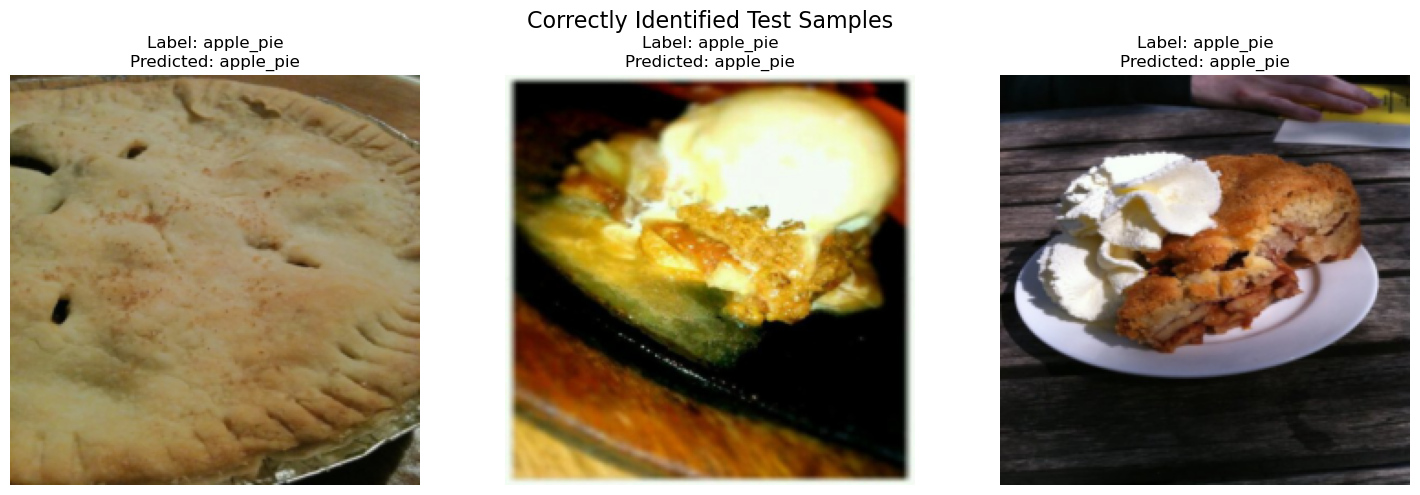

Test Results for EfficientNet - Accuracy: 0.5781, Precision: 1.0000, Recall: 0.5781, F1: 0.7327

Results for EfficientNet:
Accuracy: 0.5781
Precision: 1.0000
Recall: 0.5781
F1: 0.7327


In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define transformations (224x224 for EfficientNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\train', transform=transform)
test_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\test', transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Get number of classes
num_classes = len(train_data.classes)

# Function to load EfficientNet model
def load_efficientnet_model(num_classes):
    model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.DEFAULT)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model

# Improved evaluation function with plotting
def evaluate_model_and_plot(model, loader, device, num_samples=3):
    model.eval()
    all_preds, all_labels = [], []
    correct_examples = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Collect correctly identified images
            for i in range(len(images)):
                if preds[i] == labels[i] and len(correct_examples) < num_samples:
                    correct_examples.append((images[i].cpu(), labels[i].cpu(), preds[i].cpu()))

            if len(correct_examples) >= num_samples:
                break

    # Plot the correctly identified images
    if correct_examples:
        fig, axes = plt.subplots(1, len(correct_examples), figsize=(15, 5))
        for i, (image, label, pred) in enumerate(correct_examples):
            # Convert from CHW to HWC format and unnormalize the image
            image = image.permute(1, 2, 0)
            image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
            image = image.numpy().clip(0, 1)

            # Plot the image and add a descriptive title
            axes[i].imshow(image)
            axes[i].axis('off')
            axes[i].set_title(
                f'Label: {test_data.classes[label.item()]}\nPredicted: {test_data.classes[pred.item()]}',
                fontsize=12
            )
        plt.suptitle('Correctly Identified Test Samples', fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()

    # Calculate and return evaluation metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    return accuracy, precision, recall, f1

# Training function
def train_and_evaluate_efficientnet(train_loader, test_loader, device, num_classes, epochs=10, learning_rate=0.0001):
    model = load_efficientnet_model(num_classes).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    use_amp = torch.cuda.is_available()
    scaler = torch.cuda.amp.GradScaler() if use_amp else None

    print(f"\nTraining and evaluating EfficientNet with {epochs} epochs and learning rate {learning_rate}")
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, (images, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            if use_amp:
                with torch.amp.autocast(device_type='cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1):.4f}")

    # Evaluate on test data and plot correct examples
    accuracy, precision, recall, f1 = evaluate_model_and_plot(model, test_loader, device)
    print(f"Test Results for EfficientNet - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Run EfficientNet training and evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = train_and_evaluate_efficientnet(train_loader, test_loader, device, num_classes, epochs=10, learning_rate=0.0001)

# Display results
print("\nResults for EfficientNet:")
for metric, value in results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

C:\Users\admin\AppData\Local\Temp\ipykernel_24116\581058046.py:93: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None



Training and evaluating EfficientNet with 15 epochs and learning rate 0.0001


Epoch 1/15: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 1, Loss: 2.2077


Epoch 2/15: 100%|██████████| 1184/1184 [06:09<00:00,  3.20it/s]


Epoch 2, Loss: 0.9804


Epoch 3/15: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 3, Loss: 0.6749


Epoch 4/15: 100%|██████████| 1184/1184 [06:11<00:00,  3.19it/s]


Epoch 4, Loss: 0.4774


Epoch 5/15: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 5, Loss: 0.3410


Epoch 6/15: 100%|██████████| 1184/1184 [06:10<00:00,  3.19it/s]


Epoch 6, Loss: 0.2504


Epoch 7/15: 100%|██████████| 1184/1184 [06:10<00:00,  3.19it/s]


Epoch 7, Loss: 0.1901


Epoch 8/15: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 8, Loss: 0.1466


Epoch 9/15: 100%|██████████| 1184/1184 [06:11<00:00,  3.19it/s]


Epoch 9, Loss: 0.1212


Epoch 10/15: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 10, Loss: 0.1001


Epoch 11/15: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 11, Loss: 0.0855


Epoch 12/15: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 12, Loss: 0.0772


Epoch 13/15: 100%|██████████| 1184/1184 [06:13<00:00,  3.17it/s]


Epoch 13, Loss: 0.0680


Epoch 14/15: 100%|██████████| 1184/1184 [06:12<00:00,  3.18it/s]


Epoch 14, Loss: 0.0653


Epoch 15/15: 100%|██████████| 1184/1184 [06:11<00:00,  3.19it/s]


Epoch 15, Loss: 0.0563


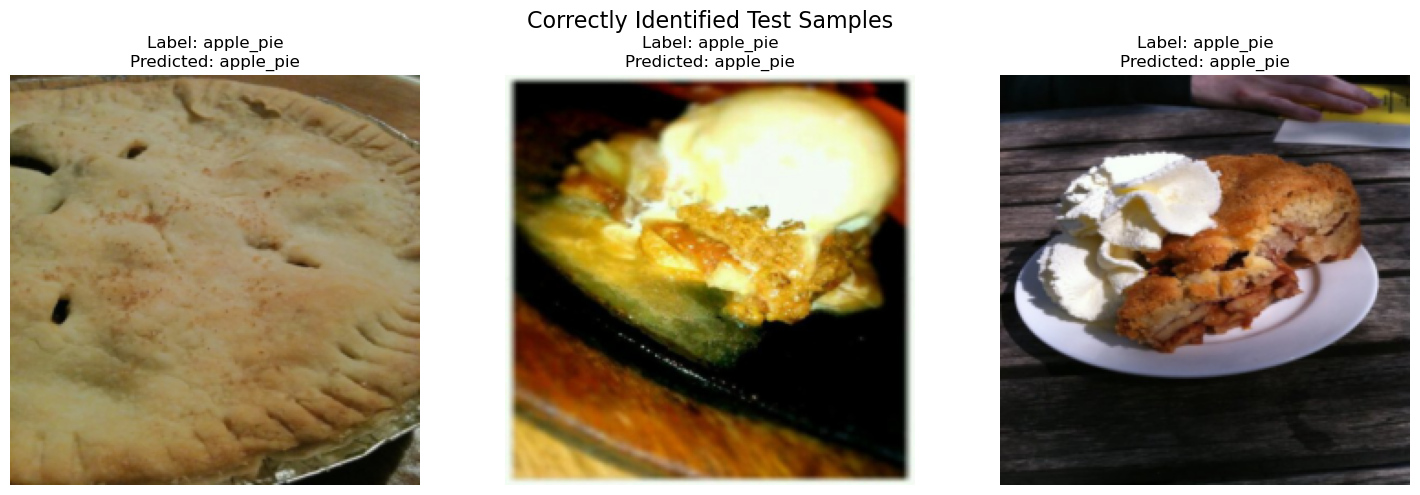

Test Results for EfficientNet - Accuracy: 0.6406, Precision: 1.0000, Recall: 0.6406, F1: 0.7810

Results for EfficientNet:
Accuracy: 0.6406
Precision: 1.0000
Recall: 0.6406
F1: 0.7810


In [5]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define transformations (224x224 for EfficientNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\train', transform=transform)
test_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\test', transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Get number of classes
num_classes = len(train_data.classes)

# Function to load EfficientNet model
def load_efficientnet_model(num_classes):
    model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.DEFAULT)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model

# Improved evaluation function with plotting
def evaluate_model_and_plot(model, loader, device, num_samples=3):
    model.eval()
    all_preds, all_labels = [], []
    correct_examples = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Collect correctly identified images
            for i in range(len(images)):
                if preds[i] == labels[i] and len(correct_examples) < num_samples:
                    correct_examples.append((images[i].cpu(), labels[i].cpu(), preds[i].cpu()))

            if len(correct_examples) >= num_samples:
                break

    # Plot the correctly identified images
    if correct_examples:
        fig, axes = plt.subplots(1, len(correct_examples), figsize=(15, 5))
        for i, (image, label, pred) in enumerate(correct_examples):
            # Convert from CHW to HWC format and unnormalize the image
            image = image.permute(1, 2, 0)
            image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
            image = image.numpy().clip(0, 1)

            # Plot the image and add a descriptive title
            axes[i].imshow(image)
            axes[i].axis('off')
            axes[i].set_title(
                f'Label: {test_data.classes[label.item()]}\nPredicted: {test_data.classes[pred.item()]}',
                fontsize=12
            )
        plt.suptitle('Correctly Identified Test Samples', fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()

    # Calculate and return evaluation metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    return accuracy, precision, recall, f1

# Training function
def train_and_evaluate_efficientnet(train_loader, test_loader, device, num_classes, epochs=10, learning_rate=0.0001):
    model = load_efficientnet_model(num_classes).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    use_amp = torch.cuda.is_available()
    scaler = torch.cuda.amp.GradScaler() if use_amp else None

    print(f"\nTraining and evaluating EfficientNet with {epochs} epochs and learning rate {learning_rate}")
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, (images, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            if use_amp:
                with torch.amp.autocast(device_type='cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1):.4f}")

    # Evaluate on test data and plot correct examples
    accuracy, precision, recall, f1 = evaluate_model_and_plot(model, test_loader, device)
    print(f"Test Results for EfficientNet - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Run EfficientNet training and evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = train_and_evaluate_efficientnet(train_loader, test_loader, device, num_classes, epochs=15, learning_rate=0.0001)

# Display results
print("\nResults for EfficientNet:")
for metric, value in results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

In [6]:
pip install optuna


[I 2024-11-18 22:48:59,088] A new study created in memory with name: no-name-94b95a50-2e33-4de6-b54f-6fbc359612b3


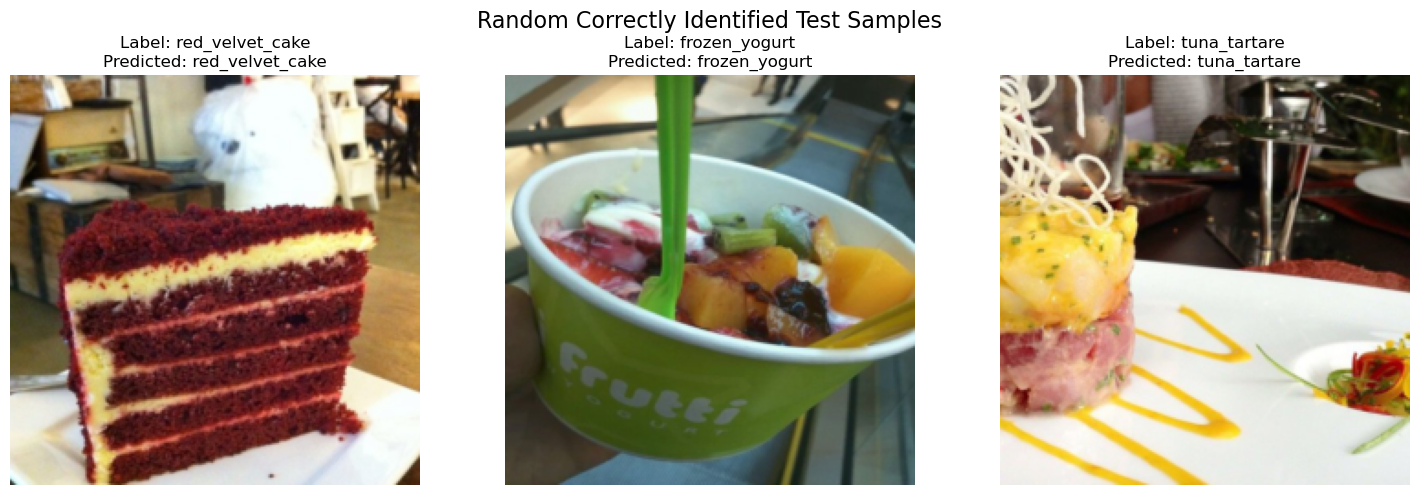

[I 2024-11-19 01:21:07,028] Trial 0 finished with value: 0.758019801980198 and parameters: {'learning_rate': 0.0023593845960882542, 'batch_size': 32, 'epochs': 20}. Best is trial 0 with value: 0.758019801980198.


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import random
import optuna

# Define transformations (224x224 for EfficientNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\train', transform=transform)
test_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\test', transform=transform)

# Get number of classes
num_classes = len(train_data.classes)

# Function to load EfficientNet model
def load_efficientnet_model(num_classes):
    model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.DEFAULT)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model

# Function to evaluate the model and plot 3 correctly predicted images
def evaluate_model_and_plot_random_correct_examples(model, loader, device, num_samples=3):
    model.eval()
    all_preds, all_labels = [], []
    correct_examples = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Collect correctly identified images
            for i in range(len(images)):
                if preds[i] == labels[i]:
                    correct_examples.append((images[i].cpu(), labels[i].cpu(), preds[i].cpu()))

    # Randomly select 3 correctly predicted images
    if len(correct_examples) > num_samples:
        correct_examples = random.sample(correct_examples, num_samples)

    # Plot the selected images
    if correct_examples:
        fig, axes = plt.subplots(1, len(correct_examples), figsize=(15, 5))
        for i, (image, label, pred) in enumerate(correct_examples):
            # Convert from CHW to HWC format and unnormalize the image
            image = image.permute(1, 2, 0)
            image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
            image = image.numpy().clip(0, 1)

            # Plot the image and add a descriptive title
            axes[i].imshow(image)
            axes[i].axis('off')
            axes[i].set_title(
                f'Label: {test_data.classes[label.item()]}\nPredicted: {test_data.classes[pred.item()]}',
                fontsize=12
            )
        plt.suptitle('Random Correctly Identified Test Samples', fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()

    # Calculate and return evaluation metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    return accuracy, precision, recall, f1

# Objective function for Optuna
def objective(trial):
    # Sample hyperparameters
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 5, 20)

    # Update DataLoader for different batch sizes
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    model = load_efficientnet_model(num_classes).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    use_amp = torch.cuda.is_available()
    scaler = torch.amp.GradScaler() if use_amp else None

    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            if use_amp:
                with torch.amp.autocast(device_type='cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

    # Evaluate the model
    accuracy, _, _, _ = evaluate_model_and_plot_random_correct_examples(model, test_loader, device)
    trial.report(accuracy, epoch)

    # Return accuracy as the objective to optimize
    return accuracy

# Run the hyperparameter tuning with Optuna
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters
print("Best hyperparameters:")
print(study.best_params)

# Train and evaluate using the best hyperparameters
best_params = study.best_params
train_loader = DataLoader(train_data, batch_size=best_params['batch_size'], shuffle=True)
test_loader = DataLoader(test_data, batch_size=best_params['batch_size'], shuffle=False)
model = load_efficientnet_model(num_classes).to(device)

results = evaluate_model_and_plot_random_correct_examples(model, test_loader, device)

# Display results
print("\nResults for EfficientNet with best hyperparameters:")
for metric, value in results.items():
    print(f"{metric.capitalize()}: {value:.4f}")


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import random
import optuna

# Define transformations (224x224 for EfficientNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\train', transform=transform)
test_data = datasets.ImageFolder(r'C:\Users\admin\Desktop\aps360_labbook\progresscheck\modelComparison\data\test', transform=transform)

# Get number of classes
num_classes = len(train_data.classes)

# Function to load EfficientNet model
def load_efficientnet_model(num_classes):
    model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.DEFAULT)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model

# Function to evaluate the model and plot 3 correctly predicted images
def evaluate_model_and_plot_random_correct_examples(model, loader, device, num_samples=3):
    model.eval()
    all_preds, all_labels = [], []
    correct_examples = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Collect correctly identified images
            for i in range(len(images)):
                if preds[i] == labels[i]:
                    correct_examples.append((images[i].cpu(), labels[i].cpu(), preds[i].cpu()))

    # Randomly select 3 correctly predicted images
    if len(correct_examples) > num_samples:
        correct_examples = random.sample(correct_examples, num_samples)

    # Plot the selected images
    if correct_examples:
        fig, axes = plt.subplots(1, len(correct_examples), figsize=(15, 5))
        for i, (image, label, pred) in enumerate(correct_examples):
            # Convert from CHW to HWC format and unnormalize the image
            image = image.permute(1, 2, 0)
            image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
            image = image.numpy().clip(0, 1)

            # Plot the image and add a descriptive title
            axes[i].imshow(image)
            axes[i].axis('off')
            axes[i].set_title(
                f'Label: {test_data.classes[label.item()]}\nPredicted: {test_data.classes[pred.item()]}',
                fontsize=12
            )
        plt.suptitle('Random Correctly Identified Test Samples', fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()

    # Calculate and return evaluation metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    return accuracy, precision, recall, f1

# Objective function for Optuna
def objective(trial):
    # Sample hyperparameters
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 5, 20)

    # Update DataLoader for different batch sizes
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    model = load_efficientnet_model(num_classes).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    use_amp = torch.cuda.is_available()
    scaler = torch.amp.GradScaler() if use_amp else None

    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            if use_amp:
                with torch.amp.autocast(device_type='cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

    # Evaluate the model
    accuracy, _, _, _ = evaluate_model_and_plot_random_correct_examples(model, test_loader, device)
    trial.report(accuracy, epoch)

    # Return accuracy as the objective to optimize
    return accuracy

# Run the hyperparameter tuning with Optuna
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters
print("Best hyperparameters:")
print(study.best_params)

# Train and evaluate using the best hyperparameters
best_params = study.best_params
train_loader = DataLoader(train_data, batch_size=best_params['batch_size'], shuffle=True)
test_loader = DataLoader(test_data, batch_size=best_params['batch_size'], shuffle=False)
model = load_efficientnet_model(num_classes).to(device)

results = evaluate_model_and_plot_random_correct_examples(model, test_loader, device)

# Display results
print("\nResults for EfficientNet with best hyperparameters:")
for metric, value in results.items():
    print(f"{metric.capitalize()}: {value:.4f}")


[I 2024-11-19 08:50:19,086] A new study created in memory with name: no-name-6891e852-98a9-46ef-9ecd-c19128bf94cf
